# Analysis of model convergence for mobility with full pooling

This notebook explores the convergence of the model on a consistant prediction as more data is fed into it.


The model explored here uses a different formula for mobility which separates all the values even those judged too colinear by the authors of the original study.

    ~ -1 + residential + transit + grocery + parks + retail + workplace


No partial pooling here, this means a single set of parameters are used for the 14 countries and French regions.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
# %matplotlib notebook

In [3]:
import os
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

## Method

This analysis is done by comparing the reported, modelled and forecasted deaths for 4 countries: France, Spain, Italy and the UK. These countries were picked as they present similar epidemics as judged by number of deaths. They do however present different lags with Italy's being the most advanced, followed by Spain and France, and finally followed by the UK.

Simulations provided with increasing days of reports are plotted on the same graph. "Convergence" is assessed visually by finding the point at which modelled and forecasted mean lines stop changing as more data is added.

Below are the plotting functions. In each plot data is grouped by code version and the fitting conditions. For France two fitting conditions exist:

- Fitting with influence from Europe and French regions;
- Fitting with influence from French regions only;

The effect of this difference has not been evaluated yet.

In [4]:
from model_analysis import * 

In [5]:
run_manifest = read_manifest('run-manifest.csv')
analysis_set = get_analysis_set(run_manifest)

## Group data in comparable runs

In [6]:
def group_by_version_and_country_num(df, x):
    regions = "No region"
    if df.loc[x, "number of zones"]>14:
        regions = "With regions"
    countries = "France only"
    if df.loc[x, "number of countries"]>1:
        countries = "Europe"
    JOBID = df.loc[x, "folder"][-7:-1]
    try:
        is_original_pooling = (
            '~ -1 + residential + transit + grocery + parks + retail + workplace'
            == df.loc[x, "model"].data["arguments"]["formula_pooling"].strip()
        ) and (
            '~ -1 + transit + retail'
            == df.loc[x, "model"].data["arguments"]["formula_partialpooling"].strip()
        )
    except:
        is_original_pooling = False
    return (df.loc[x, "version"], countries, regions, JOBID, is_original_pooling)

groups = analysis_set.groupby(lambda x : group_by_version_and_country_num(analysis_set, x))

In [7]:
func = lambda x: x[2]=="With regions" and x[0].strip()=="v5" and x[4]
for i, group in enumerate(groups):
        print(f"Group {i + 1} of {len(groups)}: {group[0]}")

Group 1 of 41: ('v2', 'Europe', 'No region', '-93205', False)
Group 2 of 41: ('v2', 'Europe', 'With regions', '-56805', False)
Group 3 of 41: ('v2', 'Europe', 'With regions', '-66081', False)
Group 4 of 41: ('v2', 'Europe', 'With regions', '-84432', False)
Group 5 of 41: ('v2', 'Europe', 'With regions', '363845', False)
Group 6 of 41: ('v2', 'France only', 'With regions', '136654', False)
Group 7 of 41: ('v2', 'France only', 'With regions', '363690', False)
Group 8 of 41: ('v2', 'France only', 'With regions', '363843', False)
Group 9 of 41: ('v2', 'France only', 'With regions', '364102', False)
Group 10 of 41: ('v3', 'Europe', 'With regions', '366561', False)
Group 11 of 41: ('v3', 'Europe', 'With regions', '367777', False)
Group 12 of 41: ('v3', 'Europe', 'With regions', '367970', False)
Group 13 of 41: ('v3', 'Europe', 'With regions', '376114', False)
Group 14 of 41: ('v3', 'France only', 'With regions', '367777', False)
Group 15 of 41: ('v3', 'France only', 'With regions', '367778',

In [8]:
prop_cycle = icl_plot_core.cycler(
    linestyle=[ '-', '--'],
    marker=[' ', 'v'],
    markevery=[ 1, 4]
)
icl_plot_core.default_color_map = plt.get_cmap("viridis")

## Analysis of convergence on France

The next few plots display data for France as a whole modelled from a range of different dates.


In [9]:
func = lambda x: x[2]=="With regions" and x[0].strip()=="v5" and x[4]

Plotting group 30 of 41: ('v5', 'Europe', 'With regions', '380502', True)
Plotting group 41 of 41: ('v5', 'France only', 'With regions', '380502', True)


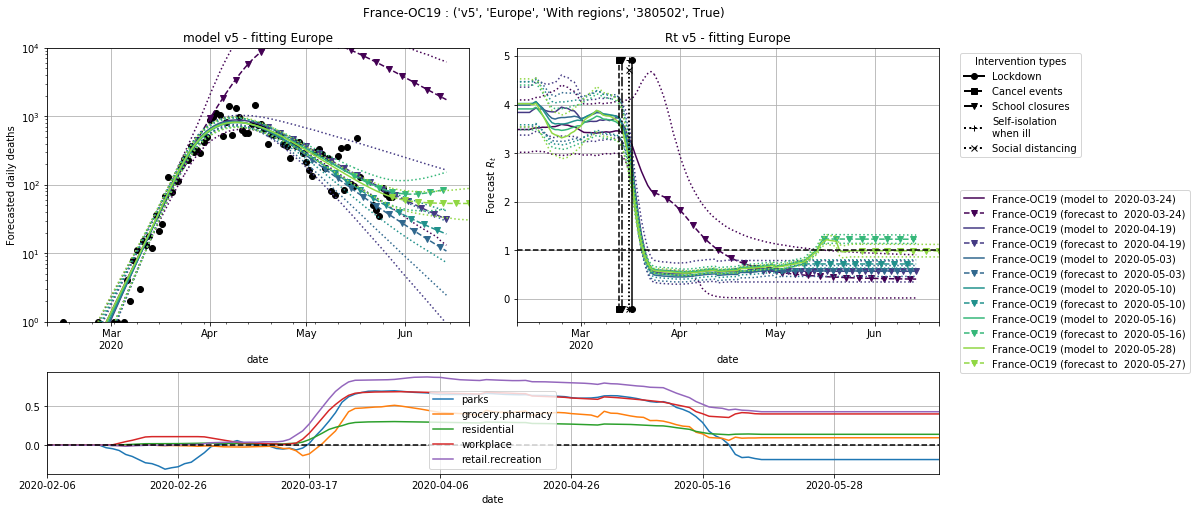

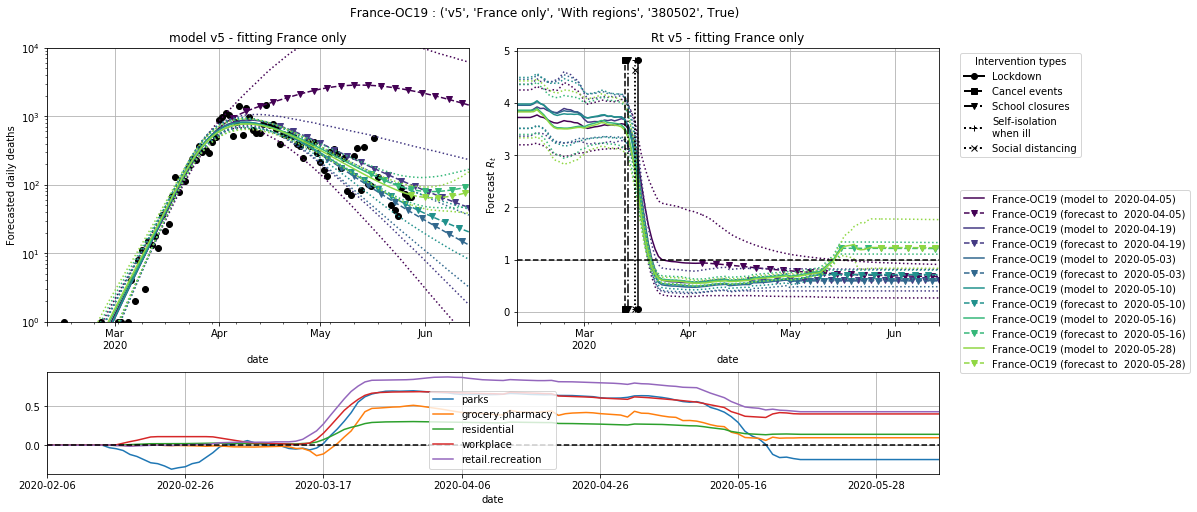

In [10]:
plot_groups(groups, "France-OC19", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

Plotting group 30 of 41: ('v5', 'Europe', 'With regions', '380502', True)
Plotting group 41 of 41: ('v5', 'France only', 'With regions', '380502', True)


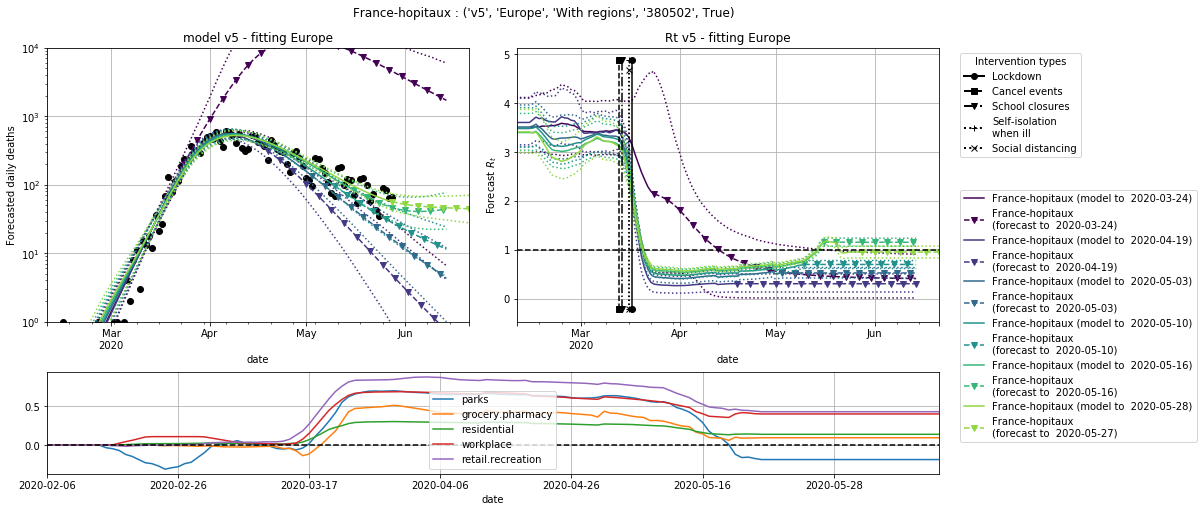

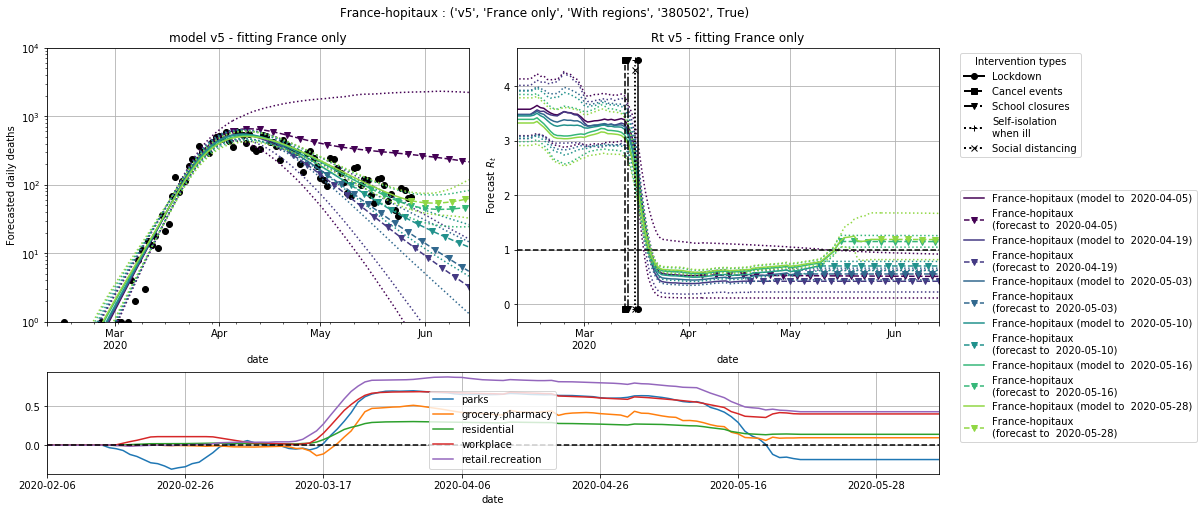

In [11]:
plot_groups(groups, "France-hopitaux", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

## Case study of European countries



In [12]:
func = lambda x: x[1]=="Europe" and x[0].strip()=="v5" and x[2]!="With regions" and x[4]

### Spain

Plotting group 24 of 41: ('v5', 'Europe', 'No region', '380502', True)


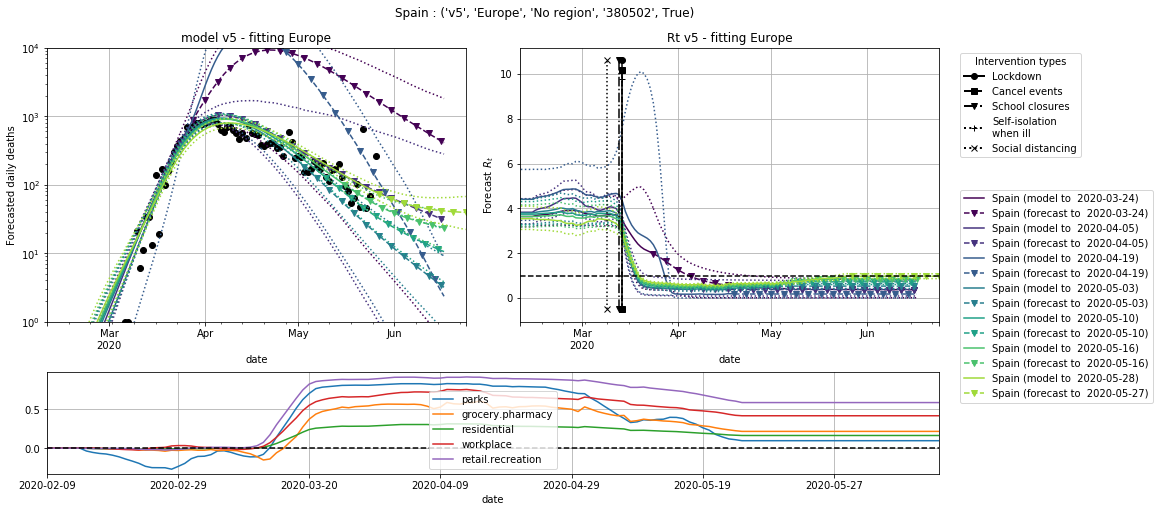

In [13]:
plot_groups(groups, "Spain", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### Italy

Plotting group 24 of 41: ('v5', 'Europe', 'No region', '380502', True)


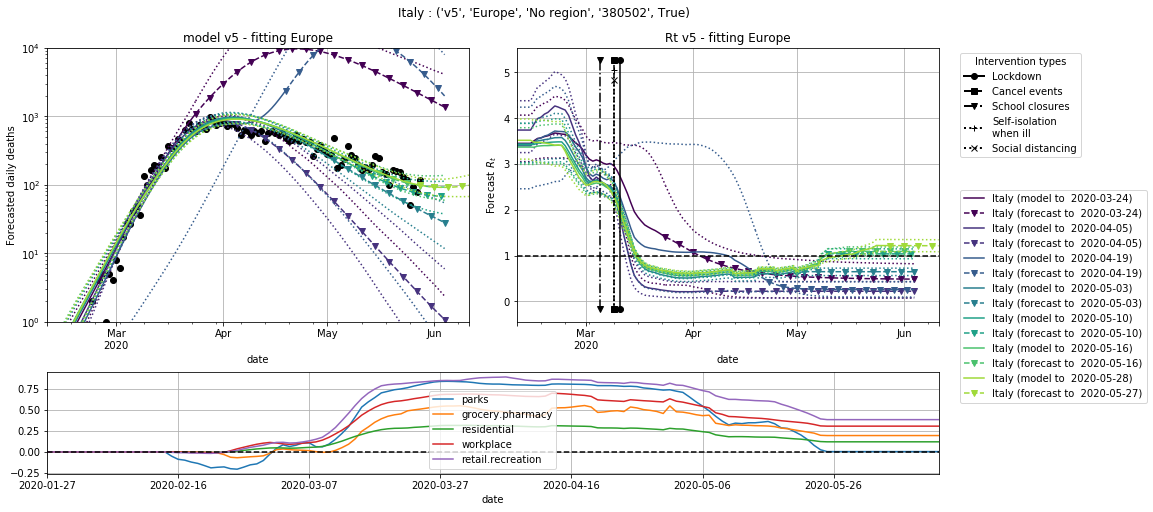

In [14]:
plot_groups(groups, "Italy", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### United_Kingdom

Plotting group 24 of 41: ('v5', 'Europe', 'No region', '380502', True)


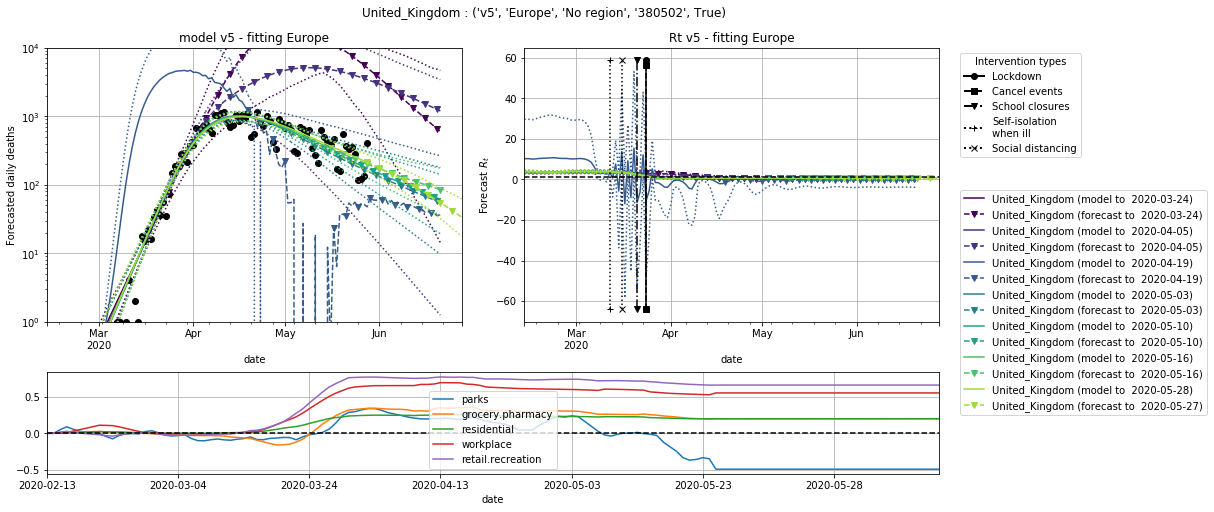

In [15]:
plot_groups(groups, "United_Kingdom", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### Germany

Plotting group 24 of 41: ('v5', 'Europe', 'No region', '380502', True)


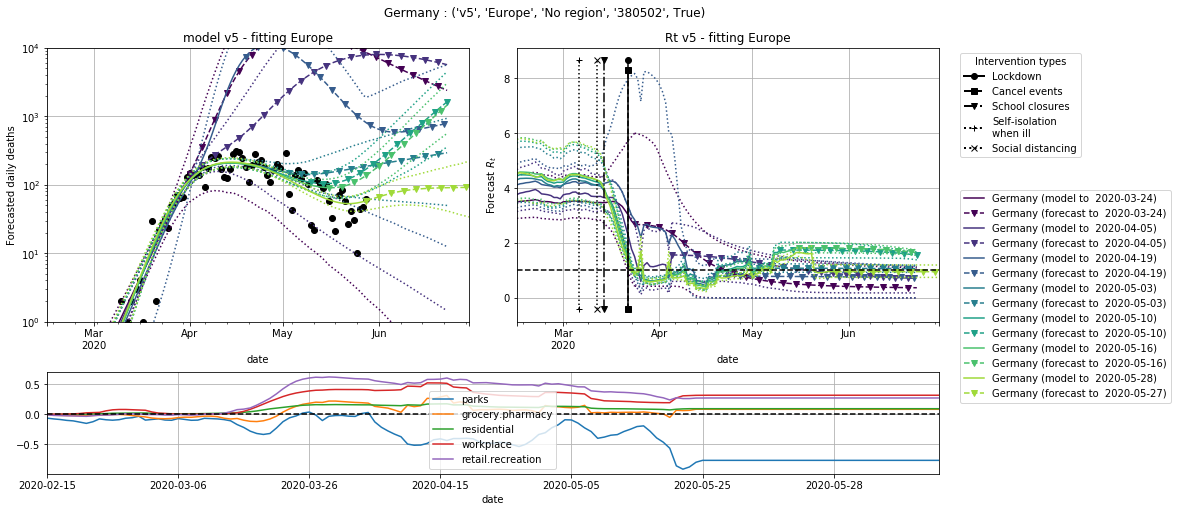

In [16]:
plot_groups(groups, "Germany", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### Netherlands

Plotting group 24 of 41: ('v5', 'Europe', 'No region', '380502', True)


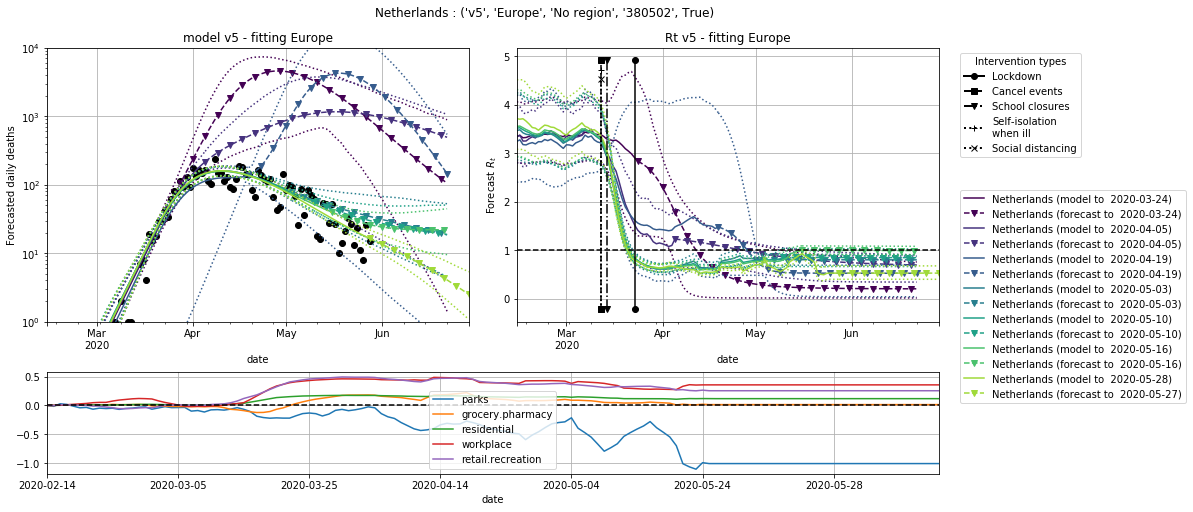

In [17]:
plot_groups(groups, "Netherlands", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### Portugal

Plotting group 24 of 41: ('v5', 'Europe', 'No region', '380502', True)


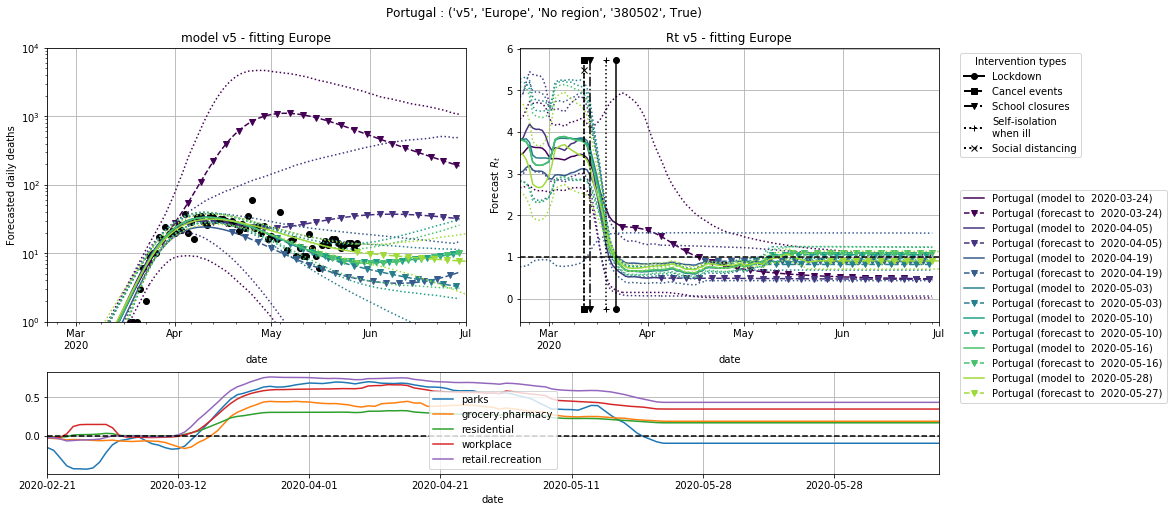

In [18]:
plot_groups(groups, "Portugal", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

### Denmark

Plotting group 24 of 41: ('v5', 'Europe', 'No region', '380502', True)


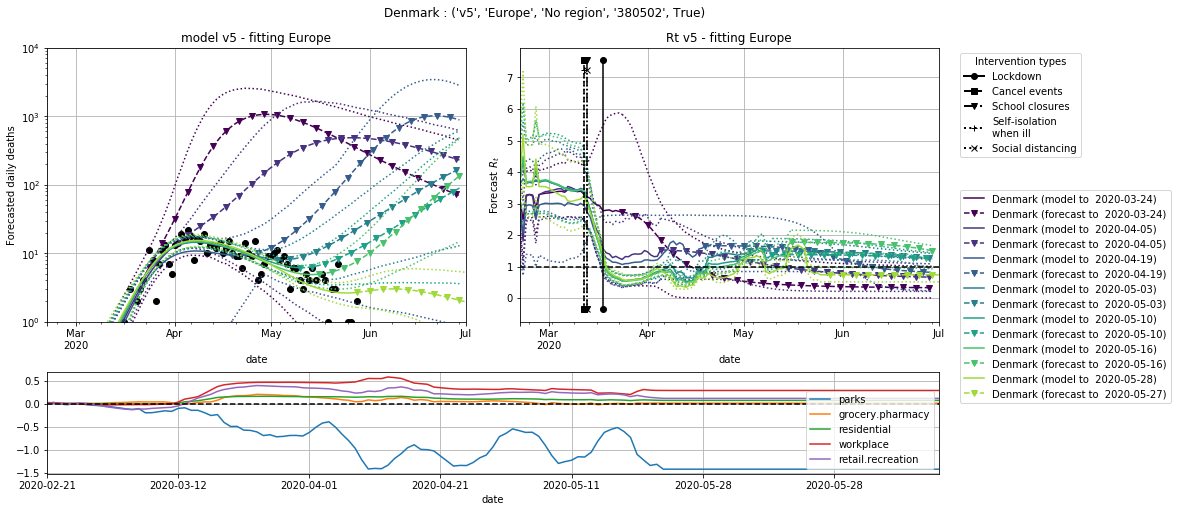

In [19]:
plot_groups(groups, "Denmark", prop_cycle, 
            cond_group=func, min_date='2020-02-10', max_date='2020-07-01')

## Conclusions

The model realy hates people going to work/school.

Also people use outdoor spaces much more in May-June than it is in January-March in Germany, the Netherlands, th UK and Denmark. The difference is not as drastic in France, and almost non existant in Portugal, Spain and Italy.
Glad I burned CPU-hours for that insight.

### Note on convergence



### Future works



## Acknowledgements / Thanks

- The MRC at Imperial for open sourcing the model and their support
- [Nathan Desdouits](https://github.com/nathan-tc) for his advice on cleaning up the colours of the plots.